In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('cleaned_data.xlsx')

In [ ]:
df.head()

,id,name,host_id,country,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,dummy_room_type,minimum_spending_required
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,1,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,200,1,125,0,177
1,20168,Studio with private bathroom in the centre 1,59484,1,Centrum-Oost,52.36509,4.89354,Private room,209,1,340,267,3,3,0,209
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,1,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,16,1,188,1,1750
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,1,Centrum-West,52.38761,4.89188,Private room,135,2,219,209,1,183,0,270
4,28871,Comfortable double room,124245,1,Centrum-West,52.36719,4.89092,Private room,75,2,334,274,2,348,0,150


In [ ]:
cross_tab = pd.crosstab([df['room_type'], df['neighbourhood']], df['availability_365'])
print(cross_tab)

availability_365                              0    1    2    3    4    5    \
room_type       neighbourhood                                                
Entire home/apt Amandus - Atheneum             46    0    0    0    0    0   
                Bijlmer-Centrum                35    1    0    0    1    0   
                Bijlmer-Oost                   30    1    0    1    0    0   
                Borgerhout Extra Muros         11    0    0    1    0    1   
                Borgerhout Intra Muros Noord   23    0    0    0    0    0   
...                                           ...  ...  ...  ...  ...  ...   
Shared room     Universiteitsbuurt              1    0    0    0    0    0   
                Watergraafsmeer                 1    0    0    0    0    0   
                Westerpark                      3    0    0    0    0    0   
                Zuid                            5    0    0    0    0    0   
                Zurenborg                       0    0    0    0

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
df_encoded = df.copy()
label_encoder = LabelEncoder()

# Encoding room_type and neighbourhood
df_encoded['room_type'] = label_encoder.fit_transform(df['room_type'])
df_encoded['neighbourhood'] = label_encoder.fit_transform(df['neighbourhood'])

# Check for missing values and handle if necessary
df_encoded = df_encoded.dropna()

# Define target and features
X = df_encoded[['room_type', 'neighbourhood', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
y = df_encoded['price']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 16899.419493999663
R-squared: 0.10738245370072275


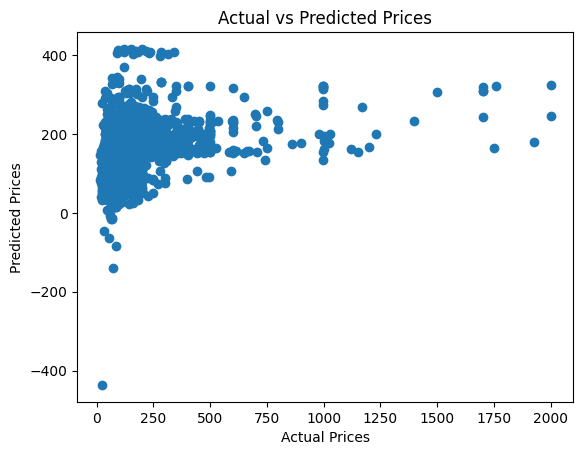

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


In [ ]:
import numpy as np

# Apply log transformation
df_encoded['log_price'] = np.log(df_encoded['price'])
df_encoded['log_minimum_nights'] = np.log(df_encoded['minimum_nights'])

# Define features and target variable
X = df_encoded[['log_minimum_nights']]  # Log of minimum nights
y = df_encoded['log_price']  # Log of price


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
log_model = LinearRegression()
log_model.fit(X_train, y_train)

# Predictions on test data
y_pred = log_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (log-transformed): {mse}")
print(f"R-squared (log-transformed): {r2}")


Mean Squared Error (log-transformed): 0.3579351888420733
R-squared (log-transformed): 0.012277799094946307


In [ ]:
print(f"Intercept: {log_model.intercept_}")
print(f"Coefficient (log_minimum_nights): {log_model.coef_[0]}")


Intercept: 4.762108789897422
Coefficient (log_minimum_nights): 0.08766165091714952


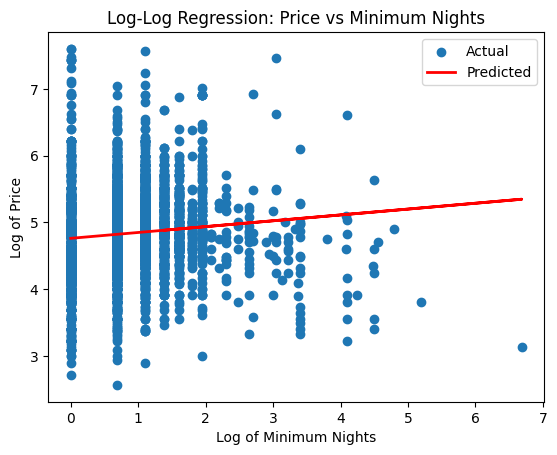

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, label="Actual")
plt.plot(X_test, y_pred, color="red", label="Predicted", linewidth=2)
plt.xlabel("Log of Minimum Nights")
plt.ylabel("Log of Price")
plt.title("Log-Log Regression: Price vs Minimum Nights")
plt.legend()
plt.show()


In [ ]:
# Calculate the IQR for log_price and log_minimum_nights
Q1_price = df_encoded['log_price'].quantile(0.25)
Q3_price = df_encoded['log_price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

Q1_min_nights = df_encoded['log_minimum_nights'].quantile(0.25)
Q3_min_nights = df_encoded['log_minimum_nights'].quantile(0.75)
IQR_min_nights = Q3_min_nights - Q1_min_nights

# Define outlier bounds
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

lower_bound_min_nights = Q1_min_nights - 1.5 * IQR_min_nights
upper_bound_min_nights = Q3_min_nights + 1.5 * IQR_min_nights

# Filter out the outliers
df_no_outliers = df_encoded[(df_encoded['log_price'] >= lower_bound_price) &
                            (df_encoded['log_price'] <= upper_bound_price) &
                            (df_encoded['log_minimum_nights'] >= lower_bound_min_nights) &
                            (df_encoded['log_minimum_nights'] <= upper_bound_min_nights)]


In [ ]:
# Define new X and y without outliers
X_no_outliers = df_no_outliers[['log_minimum_nights']]
y_no_outliers = df_no_outliers['log_price']

# Splitting the dataset
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Fit the model again
log_model_no_outliers = LinearRegression()
log_model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Predictions
y_pred_no_outliers = log_model_no_outliers.predict(X_test_no_outliers)

# Evaluate the model without outliers
mse_no_outliers = mean_squared_error(y_test_no_outliers, y_pred_no_outliers)
r2_no_outliers = r2_score(y_test_no_outliers, y_pred_no_outliers)

print(f"Mean Squared Error (without outliers): {mse_no_outliers}")
print(f"R-squared (without outliers): {r2_no_outliers}")


Mean Squared Error (without outliers): 0.24336940836945017
R-squared (without outliers): 0.007405925196770857


In [ ]:
print(f"Intercept: {log_model_no_outliers.intercept_}")
print(f"Coefficient (log_minimum_nights): {log_model_no_outliers.coef_[0]}")

Intercept: 4.7427091925913025
Coefficient (log_minimum_nights): 0.14218436370309523


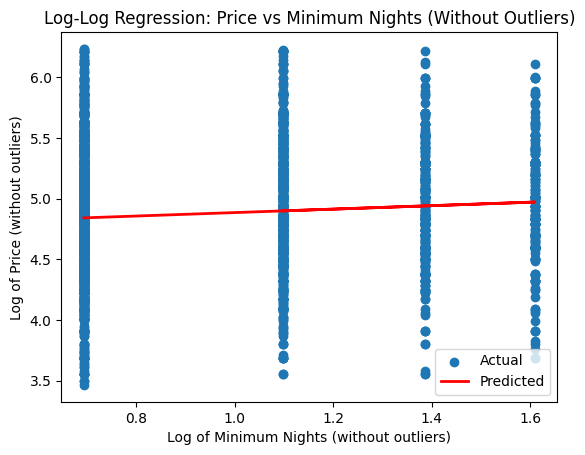

In [ ]:
plt.scatter(X_test_no_outliers, y_test_no_outliers, label="Actual")
plt.plot(X_test_no_outliers, y_pred_no_outliers, color="red", label="Predicted", linewidth=2)
plt.xlabel("Log of Minimum Nights (without outliers)")
plt.ylabel("Log of Price (without outliers)")
plt.title("Log-Log Regression: Price vs Minimum Nights (Without Outliers)")
plt.legend()
plt.show()


Mean Squared Error (log-transformed): 0.3579351888420733
R-squared (log-transformed): 0.012277799094946307

Intercept: 4.762108789897422
Coefficient (log_minimum_nights): 0.08766165091714952

Mean Squared Error (without outliers): 0.24336940836945017
R-squared (without outliers): 0.007405925196770857

Intercept: 4.7427091925913025
Coefficient (log_minimum_nights): 0.14218436370309523

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# One-hot encode room_type
df_encoded = pd.get_dummies(df_encoded, columns=['room_type'], drop_first=True)

# Features and target variable (log-transformed price)
X = df_encoded[['log_minimum_nights', 'number_of_reviews', 'availability_365', 'reviews_per_month'] + list(df_encoded.filter(like='room_type_').columns)]
y = df_encoded['log_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit the linear regression model
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Make predictions
y_pred_multi = multi_model.predict(X_test)

# Evaluate the model
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

# Coefficients and intercept
intercept_multi = multi_model.intercept_
coefficients_multi = multi_model.coef_

print(f"Mean Squared Error (multi-feature): {mse_multi}")
print(f"R-squared (multi-feature): {r2_multi}")
print(f"Intercept: {intercept_multi}")
print(f"Coefficients: {coefficients_multi}")


Mean Squared Error (multi-feature): 0.2863567553305836
R-squared (multi-feature): 0.20979849582783583
Intercept: 4.95712755655038
Coefficients: [-7.58194840e-03  6.56866268e-04  8.04546071e-04 -8.45642261e-04
 -1.19505130e-01 -5.87312358e-01 -9.49393621e-01]


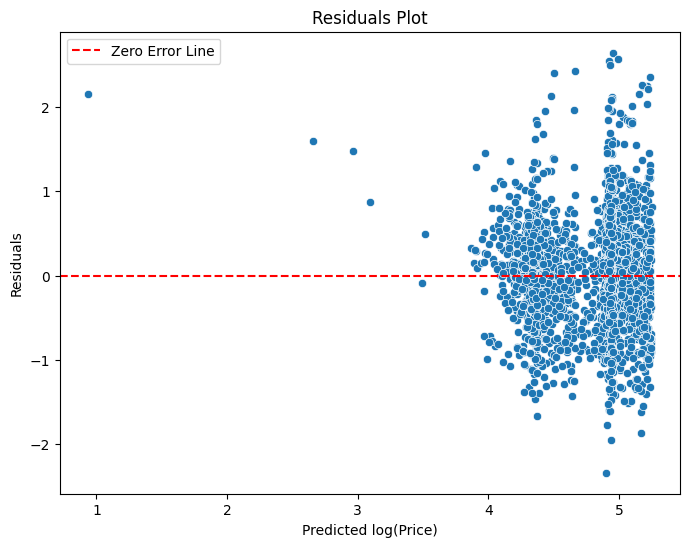

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred_multi

# Plot the residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_multi, y=residuals)
plt.axhline(0, color='r', linestyle='--', label='Zero Error Line')
plt.xlabel('Predicted log(Price)')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()

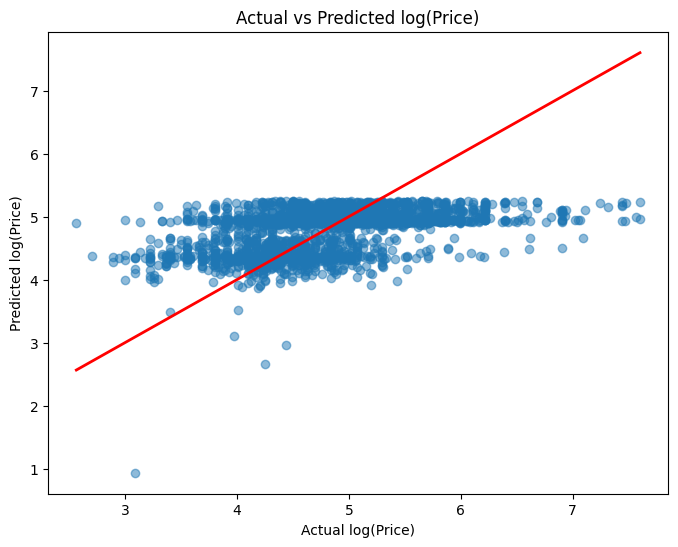

In [ ]:
# Plot actual vs predicted log(price)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_multi, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # 45-degree line
plt.xlabel('Actual log(Price)')
plt.ylabel('Predicted log(Price)')
plt.title('Actual vs Predicted log(Price)')
plt.show()


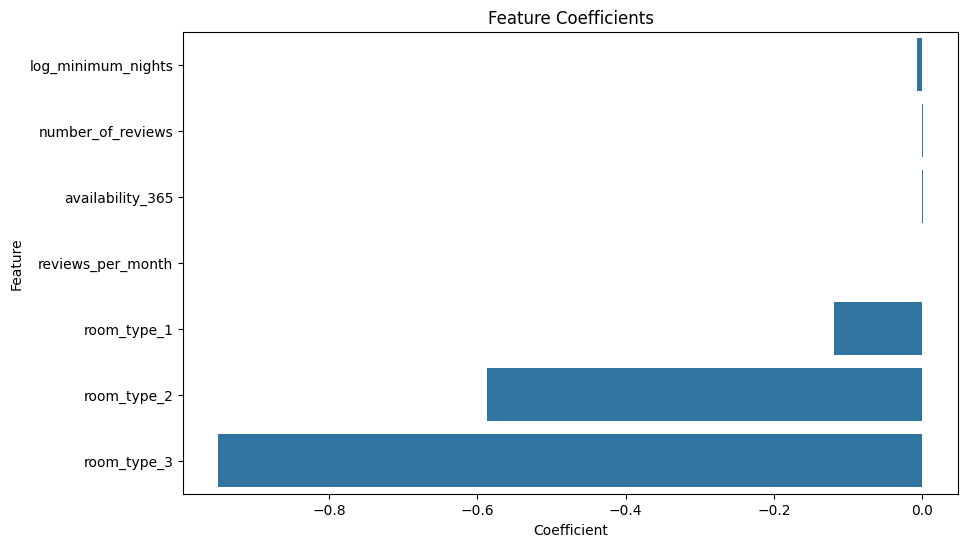

In [ ]:
import pandas as pd

# Create a dataframe for coefficients
coef_data = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients_multi
})

# Plot the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_data)
plt.title('Feature Coefficients')
plt.show()


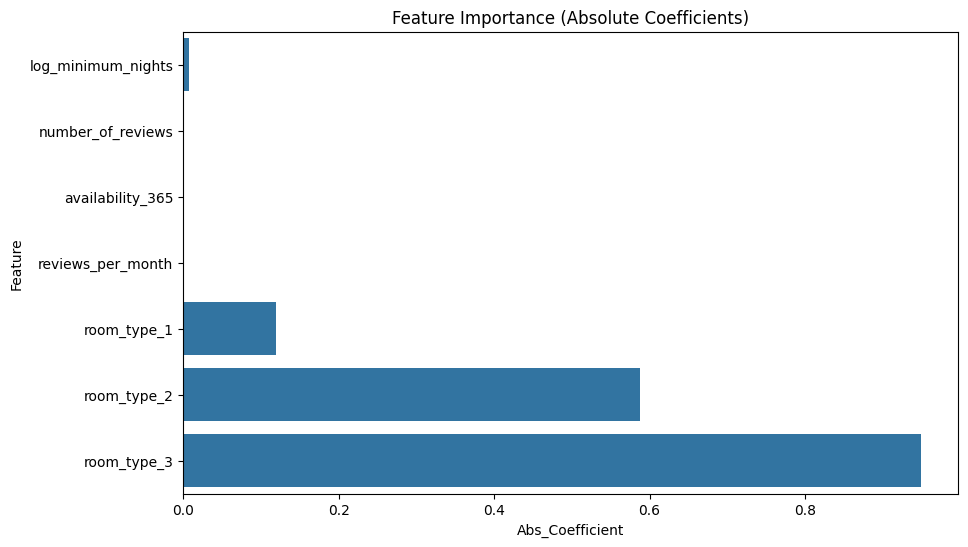

In [ ]:
# Plot absolute value of coefficients (feature importance)
plt.figure(figsize=(10, 6))
coef_data['Abs_Coefficient'] = coef_data['Coefficient'].abs()
sns.barplot(x='Abs_Coefficient', y='Feature', data=coef_data)
plt.title('Feature Importance (Absolute Coefficients)')
plt.show()

<ipython-input-26-601af8c030a6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neighborhood_host_counts.index, y=neighborhood_host_counts.values, palette='coolwarm')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'De Baarsjes - Oud-West'),
  Text(1, 0, 'De Pijp - Rivierenbuurt'),
  Text(2, 0, 'Centrum-West'),
  Text(3, 0, 'Centrum-Oost'),
  Text(4, 0, 'Zuid'),
  Text(5, 0, 'Westerpark'),
  Text(6, 0, 'Oud-Oost'),
  Text(7, 0, 'Bos en Lommer'),
  Text(8, 0, 'Oostelijk Havengebied - Indische Buurt'),
  Text(9, 0, 'Oud-Noord')])

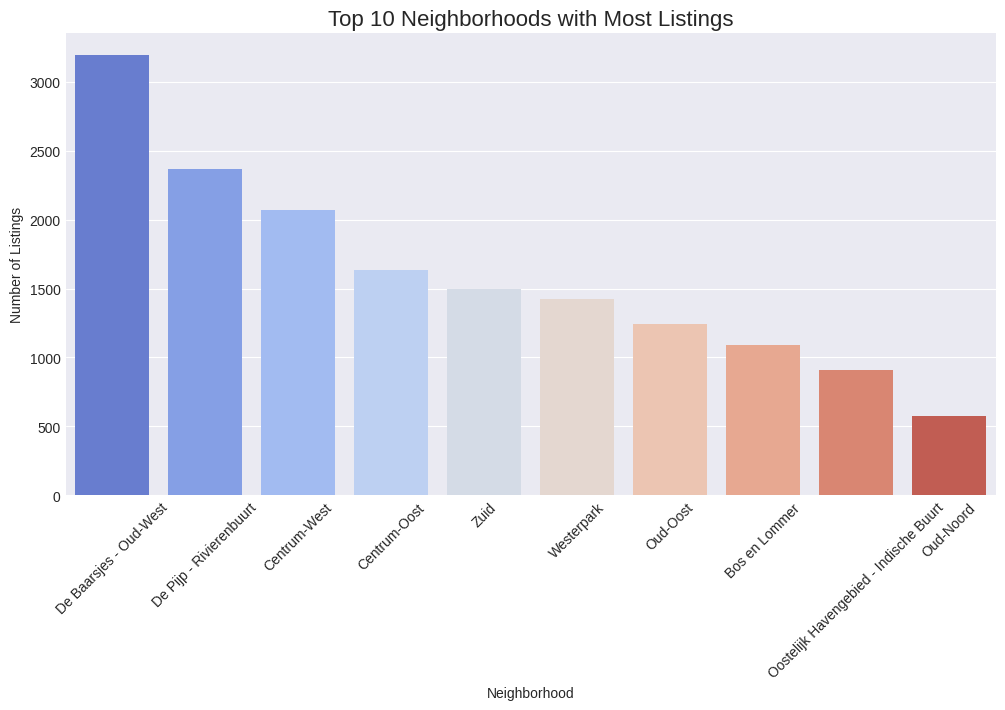

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.figure(figsize=(12, 6))
neighborhood_host_counts = df['neighbourhood'].value_counts().head(10)
sns.barplot(x=neighborhood_host_counts.index, y=neighborhood_host_counts.values, palette='coolwarm')
plt.title("Top 10 Neighborhoods with Most Listings", fontsize=16)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)

In [ ]:
mean_price_by_neighbourhood = df.groupby("neighbourhood")["price"].mean().sort_values(ascending = False).round(2)

# Print object type, shape, and head
print("mean_price_by_neighbourhood type:", type(mean_price_by_neighbourhood))
print("mean_price_by_neighbourhood shape:", mean_price_by_neighbourhood.shape)
mean_price_by_neighbourhood_10 = mean_price_by_neighbourhood.head(10)

mean_price_by_neighbourhood type: <class 'pandas.core.series.Series'>
mean_price_by_neighbourhood shape: (78,)


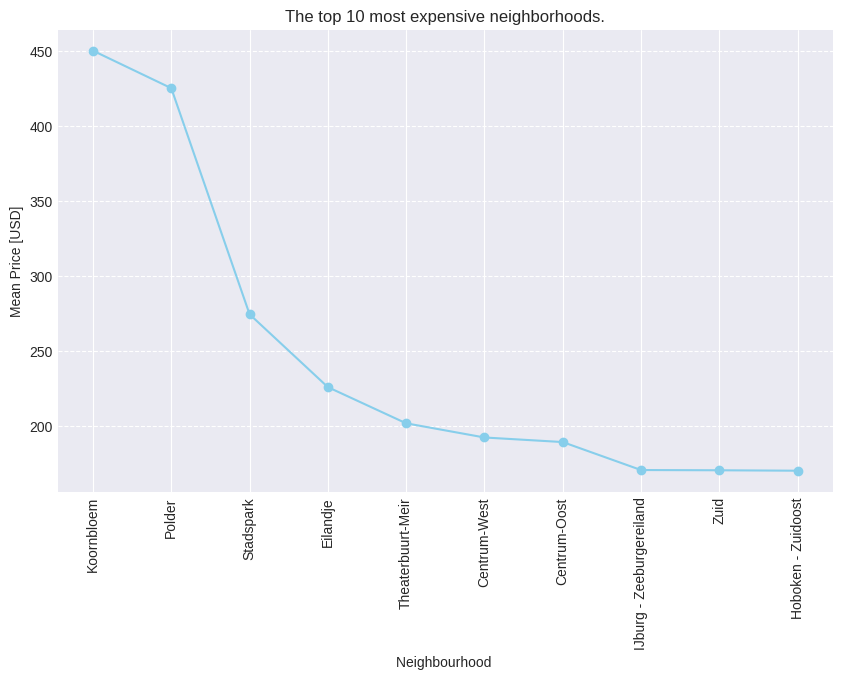

In [ ]:
# The top 10 most expensive neighborhoods.
plt.figure(figsize=(10, 6))
plt.plot(mean_price_by_neighbourhood_10, 'o-', color='skyblue')
plt.xlabel('Neighbourhood ')
plt.ylabel('Mean Price [USD]')
plt.title('The top 10 most expensive neighborhoods.')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import plotly.express as px
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df['longitude'].head()

,longitude
0,4.94142
1,4.89354
2,4.88339
3,4.89188
4,4.89092


In [ ]:
fig = px.scatter_mapbox(
    df,
    lat= "latitude",
    lon= "longitude",
    center={"lat": 52.36575, "lon": 4.94142},
    width=800,
    height=800,
    zoom=9,
    hover_data=["price"],
)

# Add mapbox_style to figure layout
fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [ ]:
import numpy as np

# Define the boundaries for each neighbourhood_group based on latitude and longitude
def assign_neighbourhood_group(row):
    # Example ranges for 'Center' region
    if (52.35 <= row['latitude'] <= 52.40) and (4.88 <= row['longitude'] <= 4.92):
        return 'Center'
    # Example ranges for 'West' region
    elif (52.36 <= row['latitude'] <= 52.38) and (4.83 <= row['longitude'] <= 4.88):
        return 'West'
    # Example ranges for 'East' region
    elif (52.34 <= row['latitude'] <= 52.38) and (4.93 <= row['longitude'] <= 4.95):
        return 'East'
    # Example ranges for 'South' region
    elif (52.33 <= row['latitude'] <= 52.35) and (4.84 <= row['longitude'] <= 4.87):
        return 'South'
    # If the listing doesn't fall into any of these categories, assign 'Other'
    else:
        return 'Other'

# Apply the function to create a new column 'neighbourhood_group'
df['neighbourhood_group'] = df.apply(assign_neighbourhood_group, axis=1)

# Check the result
print(df[['latitude', 'longitude', 'neighbourhood_group']].head())


   latitude  longitude neighbourhood_group
0  52.36575    4.94142                East
1  52.36509    4.89354              Center
2  52.37297    4.88339              Center
3  52.38761    4.89188              Center
4  52.36719    4.89092              Center


In [ ]:
fig = px.scatter_mapbox(df, lat='latitude', lon='longitude', color='neighbourhood_group',
                        hover_name='name', hover_data=['price', 'number_of_reviews'],
                        zoom=10)

fig.update_layout(mapbox_style="carto-positron",
                  mapbox=dict(center=dict(lat = 52.36575, lon = 4.94142),
                              zoom=9),
                  height=600,
                  width=1000
                  )

fig.show()

In [ ]:
df_new = pd.read_excel('cleaned_data.xlsx')

In [ ]:
print(df_new.columns)

Index(['id', 'name', 'host_id', 'country', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'dummy_room_type',
       'minimum_spending_required'],
      dtype='object')


Mean Squared Error: 0.3278161276776155
R-squared: 0.0953913523580151
Intercept: 4.55713655692521
Coefficient (dummy_room_type): 0.33990868106675814


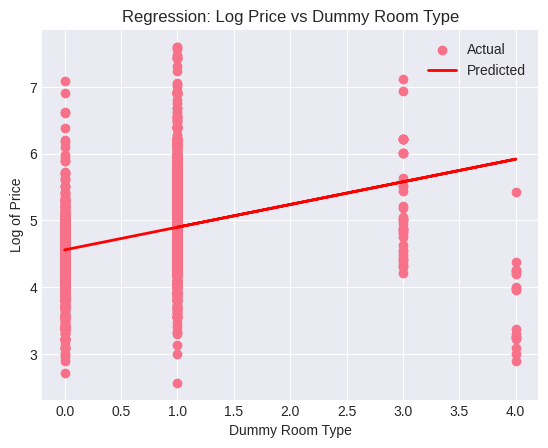

In [ ]:
import matplotlib.pyplot as plt
# Assuming 'dummy_room_type' is already created in your DataFrame (df_encoded)

# Define features and target variable
X = df_encoded[['dummy_room_type']]  # Assuming 'dummy_room_type' is a column in df_encoded
y = df_encoded['log_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print the coefficients and intercept
print(f"Intercept: {model.intercept_}")
print(f"Coefficient (dummy_room_type): {model.coef_[0]}")

# Plot the regression line
plt.scatter(X_test, y_test, label="Actual")
plt.plot(X_test, y_pred, color="red", label="Predicted", linewidth=2)
plt.xlabel("Dummy Room Type")
plt.ylabel("Log of Price")
plt.title("Regression: Log Price vs Dummy Room Type")
plt.legend()
plt.show()


In [ ]:

print(df_new['room_type'].unique())


['Private room' 'Entire home/apt' 'Hotel room' 'Shared room']


In [ ]:
# Create a dictionary to map room types to dummy variables
room_type_mapping = {
    'Entire home/apt': 0,
    'Private room': 1,
    'Shared room': 2,
    'Hotel room': 3
}

# Create a new column 'dummy_room' by mapping 'room_type' using the dictionary
df_new['dummy_room'] = df_new['room_type'].map(room_type_mapping)

# Print the updated DataFrame to verify the changes
print(df_new[['room_type', 'dummy_room']].head())


         room_type  dummy_room
0     Private room           1
1     Private room           1
2  Entire home/apt           0
3     Private room           1
4     Private room           1


In [ ]:
count_dummy_room_2 = df_new['dummy_room'].value_counts().get(2, 0)
print(f"Number of dummy room 2: {count_dummy_room_2}")


Number of dummy room 2: 95


Mean Squared Error: 0.32102927475212206
R-squared: 0.11411967390268707
Intercept: 4.932652912957021
Coefficient (dummy_room): -0.37255061407223344


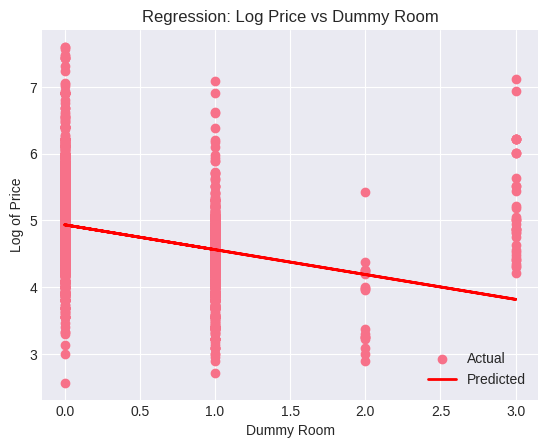

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
# Define features and target variable
X = df_new[['dummy_room']]
y = df_new['price']  # Use 'price' instead of 'log_price' if you want to analyze original price

# Apply log transformation to the target variable
y_log = np.log(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print the coefficients and intercept
print(f"Intercept: {model.intercept_}")
print(f"Coefficient (dummy_room): {model.coef_[0]}")

# Plot the regression line
plt.scatter(X_test, y_test, label="Actual")
plt.plot(X_test, y_pred, color="red", label="Predicted", linewidth=2)
plt.xlabel("Dummy Room")
plt.ylabel("Log of Price")
plt.title("Regression: Log Price vs Dummy Room")
plt.legend()
plt.show()


In [ ]:
print(df_new.columns)

Index(['id', 'name', 'host_id', 'country', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'dummy_room_type',
       'minimum_spending_required', 'dummy_room'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Include more features
X = df_new[['dummy_room', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']]
y = df_new['price']

# Apply log transformation to the target variable
y_log = np.log(y)

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_log, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print the coefficients and intercept
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


Mean Squared Error: 0.29049408921948555
R-squared: 0.19838152241472906
Intercept: 4.994122912364814
Coefficients: [-8.59669187e-01 -1.58603383e-03  1.83326070e-03 -1.11450763e-03
  2.83557931e-01  3.11913638e-04  2.07133270e-05  8.01544802e-05
  8.37411405e-07 -2.51309046e-05  2.09054466e-05  1.21545359e-07
 -1.68009551e-06  3.63336693e-07]


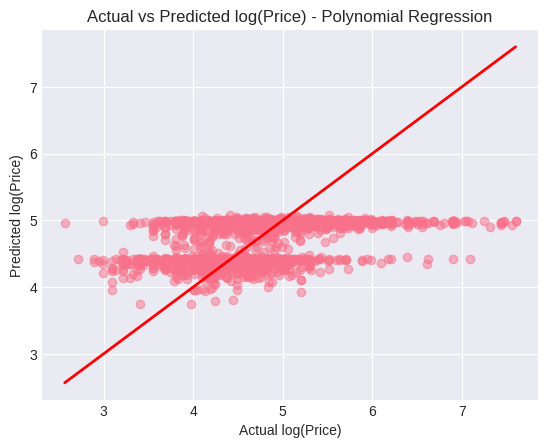

In [ ]:
import matplotlib.pyplot as plt
# Assuming you want to plot the actual vs predicted log prices for the polynomial regression model

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # 45-degree line
plt.xlabel('Actual log(Price)')
plt.ylabel('Predicted log(Price)')
plt.title('Actual vs Predicted log(Price) - Polynomial Regression')
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame for coefficients
features = poly.get_feature_names_out(input_features=['dummy_room', 'minimum_nights', 'number_of_reviews', 'reviews_per_month'])
coefficients = model.coef_

coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Sort by absolute value of coefficients
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the coefficients
print(coef_df[['Feature', 'Coefficient', 'Abs_Coefficient']])



                                Feature   Coefficient  Abs_Coefficient
0                            dummy_room -8.596692e-01     8.596692e-01
4                          dummy_room^2  2.835579e-01     2.835579e-01
2                     number_of_reviews  1.833261e-03     1.833261e-03
1                        minimum_nights -1.586034e-03     1.586034e-03
3                     reviews_per_month -1.114508e-03     1.114508e-03
5             dummy_room minimum_nights  3.119136e-04     3.119136e-04
7          dummy_room reviews_per_month  8.015448e-05     8.015448e-05
9      minimum_nights number_of_reviews -2.513090e-05     2.513090e-05
10     minimum_nights reviews_per_month  2.090545e-05     2.090545e-05
6          dummy_room number_of_reviews  2.071333e-05     2.071333e-05
12  number_of_reviews reviews_per_month -1.680096e-06     1.680096e-06
8                      minimum_nights^2  8.374114e-07     8.374114e-07
13                  reviews_per_month^2  3.633367e-07     3.633367e-07
11    

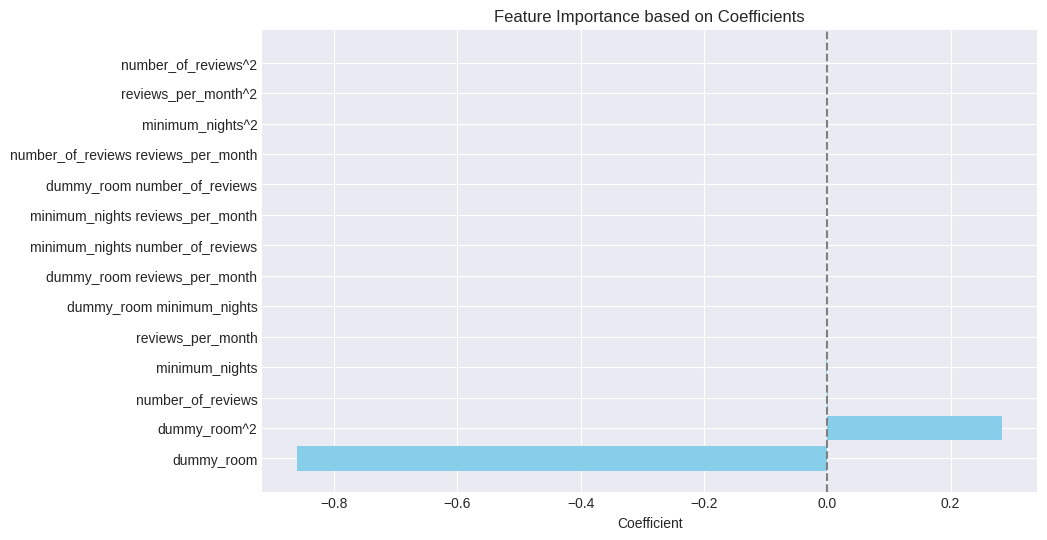

In [ ]:
import matplotlib.pyplot as plt

# Sort coefficients for plotting
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(coef_df_sorted['Feature'], coef_df_sorted['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.title('Feature Importance based on Coefficients')
plt.axvline(0, color='grey', linestyle='--')  # Add a vertical line at x=0
plt.show()


In [ ]:
# Calculate correlation
correlation_matrix = df_new[['price', 'minimum_nights', 'minimum_spending_required']].corr()
print(correlation_matrix)

                              price  minimum_nights  minimum_spending_required
price                      1.000000        0.023279                   0.245926
minimum_nights             0.023279        1.000000                   0.404216
minimum_spending_required  0.245926        0.404216                   1.000000


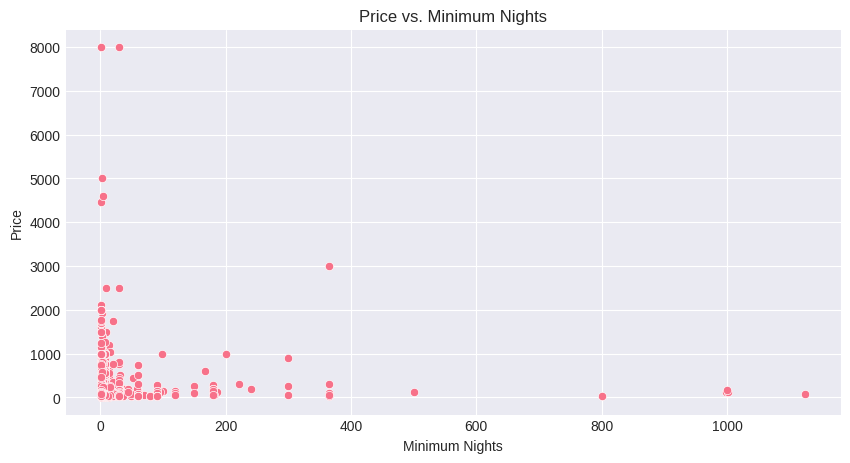

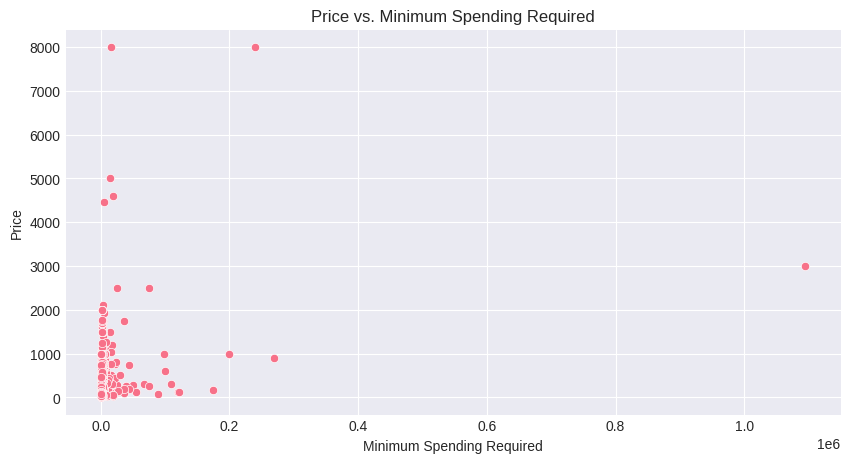

In [ ]:
import seaborn as sns

# Scatter plot: Price vs. Minimum Nights
plt.figure(figsize=(10, 5))
sns.scatterplot(x='minimum_nights', y='price', data=df_airbnb)
plt.title('Price vs. Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.show()

# Scatter plot: Price vs. Minimum Spending Required
plt.figure(figsize=(10, 5))
sns.scatterplot(x='minimum_spending_required', y='price', data=df_airbnb)
plt.title('Price vs. Minimum Spending Required')
plt.xlabel('Minimum Spending Required')
plt.ylabel('Price')
plt.show()


In [ ]:
import numpy as np

# Taking the log of minimum_nights and minimum_spending_required
df_new['log_minimum_nights'] = np.log1p(df_new['minimum_nights'])  # log(1 + x)
df_new['log_minimum_spending_required'] = np.log1p(df_new['minimum_spending_required'])

# Taking the log of price
df_new['log_price'] = np.log1p(df_new['price'])


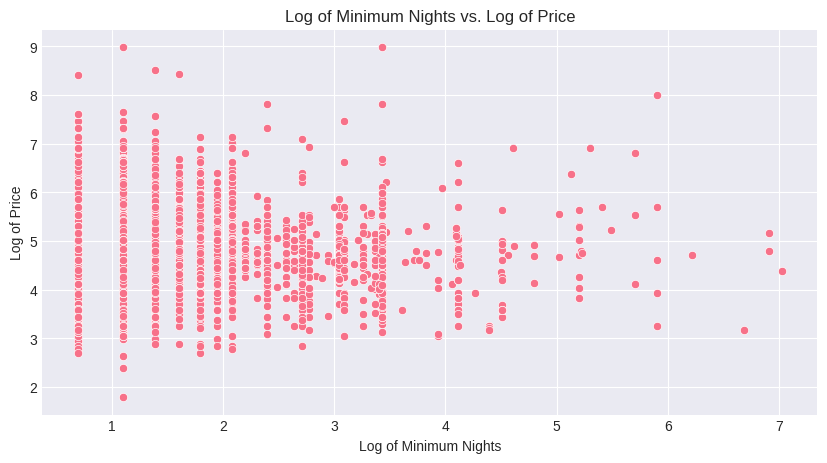

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.scatterplot(x='log_minimum_nights', y='log_price', data=df_new)
plt.title('Log of Minimum Nights vs. Log of Price')
plt.xlabel('Log of Minimum Nights')
plt.ylabel('Log of Price')
plt.show()


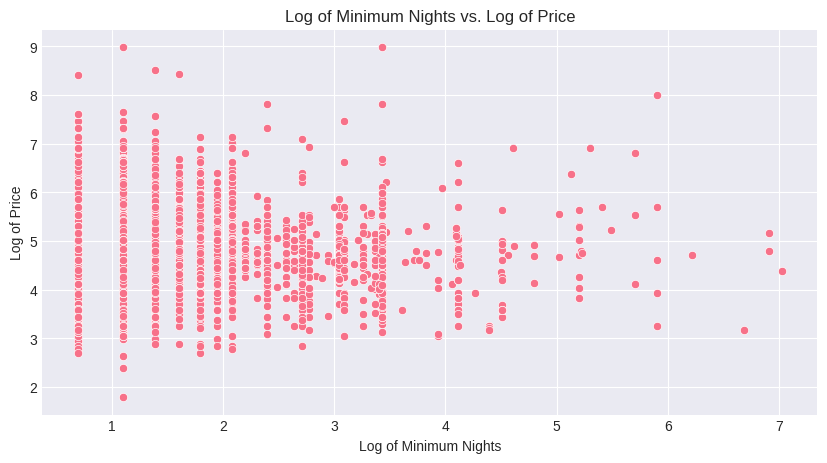

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.scatterplot(x='log_minimum_nights', y='log_price', data=df_new)
plt.title('Log of Minimum Nights vs. Log of Price')
plt.xlabel('Log of Minimum Nights')
plt.ylabel('Log of Price')
plt.show()


In [ ]:
# Calculate IQR for price and minimum_nights
Q1_price = df_new['price'].quantile(0.01)
Q3_price = df_new['price'].quantile(0.99)
IQR_price = Q3_price - Q1_price

Q1_min_nights = df_new['minimum_nights'].quantile(0.01)
Q3_min_nights = df_new['minimum_nights'].quantile(0.99)
IQR_min_nights = Q3_min_nights - Q1_min_nights

# Filter out outliers
df_no_outliers = df_new[
    (df_new['price'] >= Q1_price - 1.5 * IQR_price) & (df_new['price'] <= Q3_price + 1.5 * IQR_price) &
    (df_new['minimum_nights'] >= Q1_min_nights - 1.5 * IQR_min_nights) & (df_new['minimum_nights'] <= Q3_min_nights + 1.5 * IQR_min_nights)
]


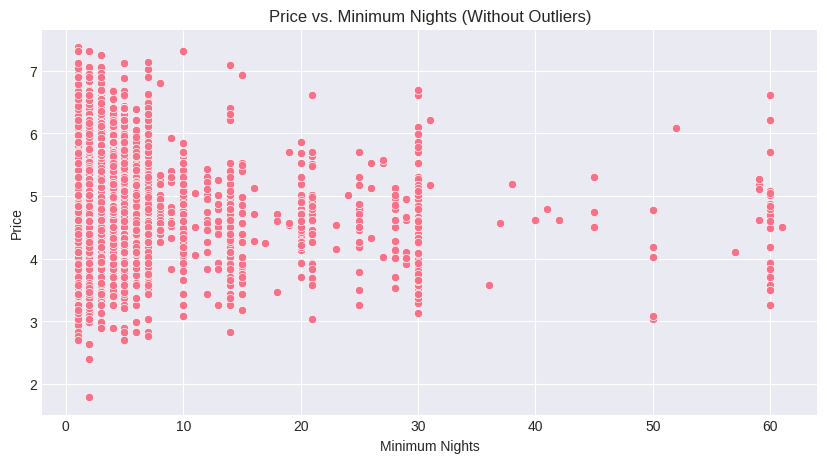

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='minimum_nights', y='log_price', data=df_no_outliers)
plt.title('Price vs. Minimum Nights (Without Outliers)')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.show()


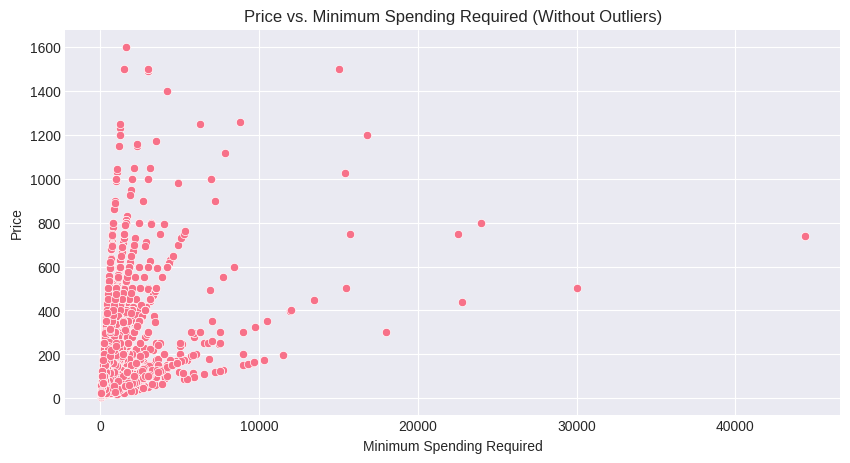

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='minimum_spending_required', y='price', data=df_no_outliers)
plt.title('Price vs. Minimum Spending Required (Without Outliers)')
plt.xlabel('Minimum Spending Required')
plt.ylabel('Price')
plt.show()


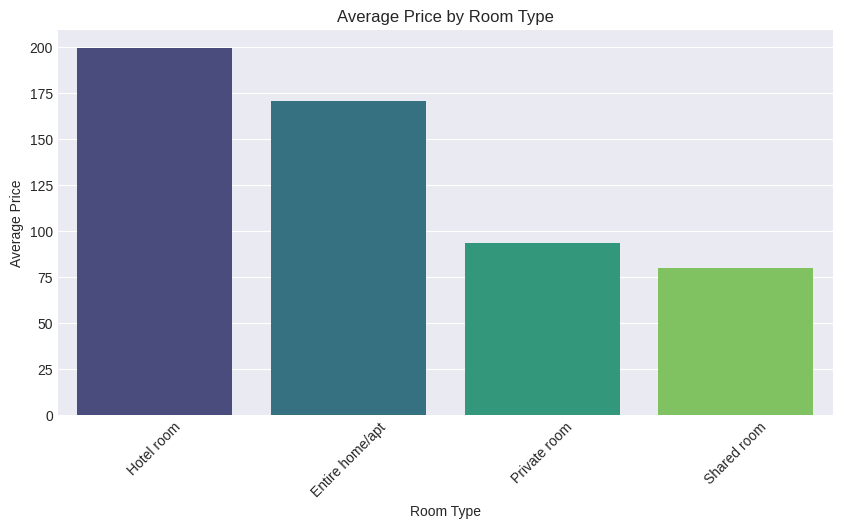

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average price by room type
average_price_by_room_type = df_new.groupby('room_type')['price'].mean().reset_index()

# Sort the values for better visualization
average_price_by_room_type = average_price_by_room_type.sort_values(by='price', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x='room_type', y='price', data=average_price_by_room_type, palette='viridis')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


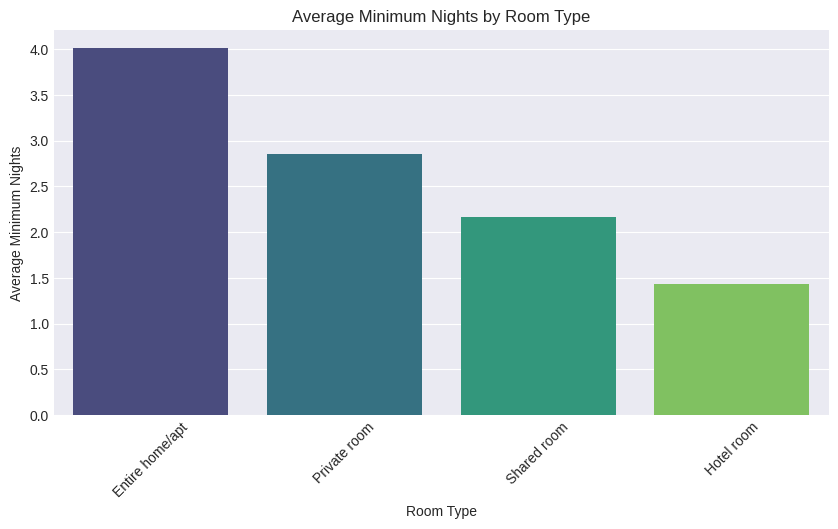

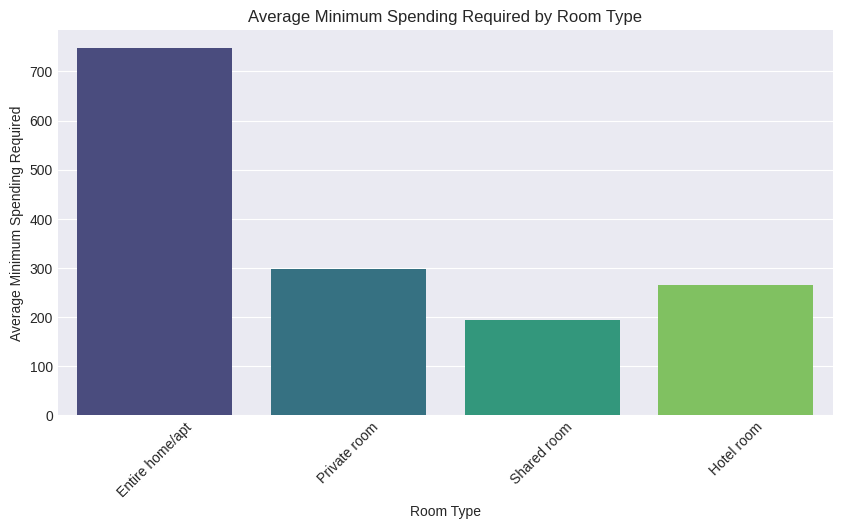

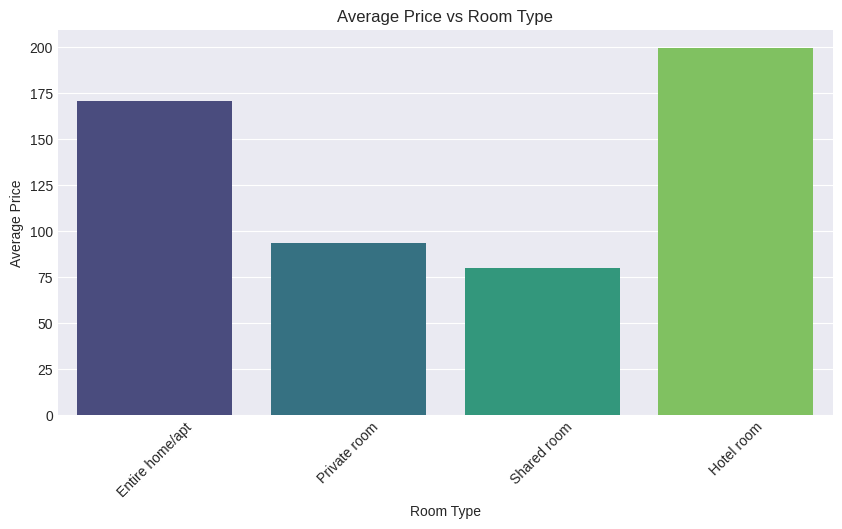

In [ ]:
# Calculate average minimum nights and minimum spending required by room type
avg_min_nights_spending = df_new.groupby('room_type').agg(
    avg_min_nights=('minimum_nights', 'mean'),
    avg_price=('price', 'mean'),
    avg_min_spending=('minimum_spending_required', 'mean')
).reset_index()

# Sort values for better visualization
avg_min_nights_spending = avg_min_nights_spending.sort_values(by='avg_min_nights', ascending=False)

# Create a bar plot for Average Minimum Nights
plt.figure(figsize=(10, 5))
sns.barplot(x='room_type', y='avg_min_nights', data=avg_min_nights_spending, palette='viridis')
plt.title('Average Minimum Nights by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Minimum Nights')
plt.xticks(rotation=45)
plt.show()

# Create a bar plot for Average Minimum Spending Required
plt.figure(figsize=(10, 5))
sns.barplot(x='room_type', y='avg_min_spending', data=avg_min_nights_spending, palette='viridis')
plt.title('Average Minimum Spending Required by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Minimum Spending Required')
plt.xticks(rotation=45)
plt.show()

# Create a bar plot for Average Minimum Spending Required
plt.figure(figsize=(10, 5))
sns.barplot(x='room_type', y='avg_price', data=avg_min_nights_spending, palette='viridis')
plt.title('Average Price vs Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


In [ ]:
print(avg_min_nights_spending)


         room_type  avg_min_nights   avg_price  avg_min_spending
0  Entire home/apt        4.008268  170.763414        747.103989
2     Private room        2.855575   93.714286        297.302284
3      Shared room        2.168421   79.789474        192.726316
1       Hotel room        1.429167  199.500000        264.633333


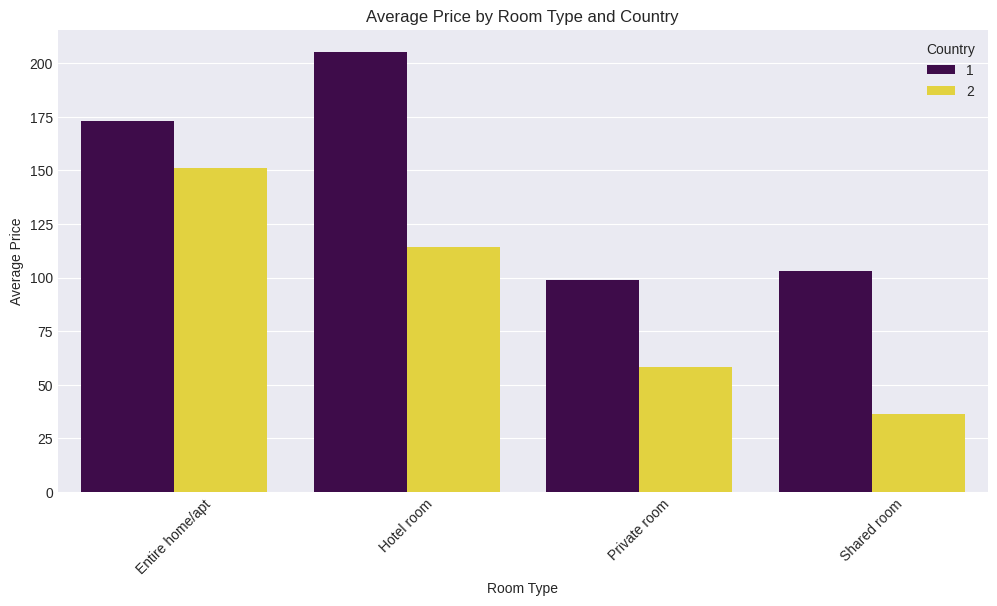

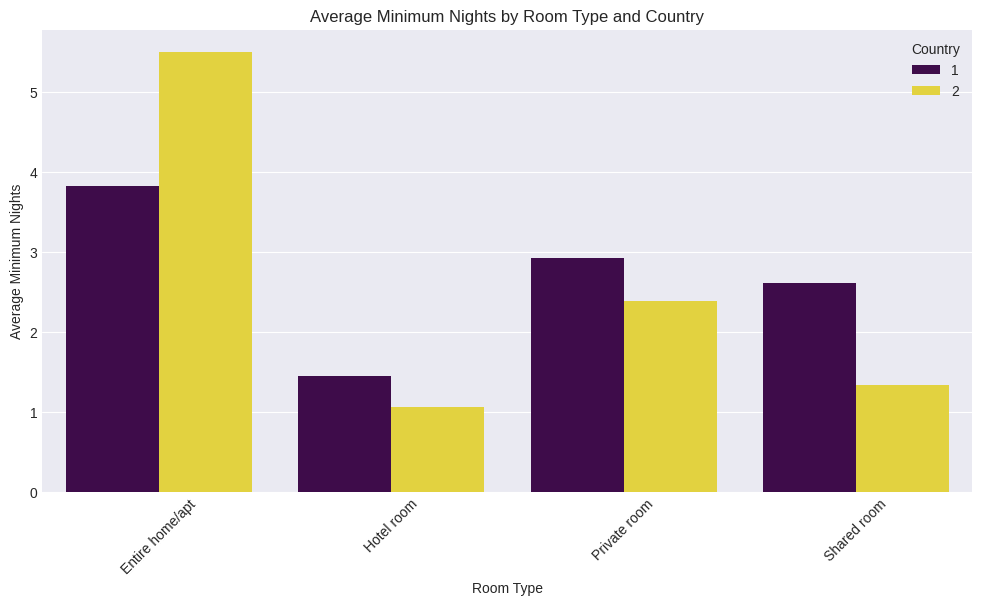

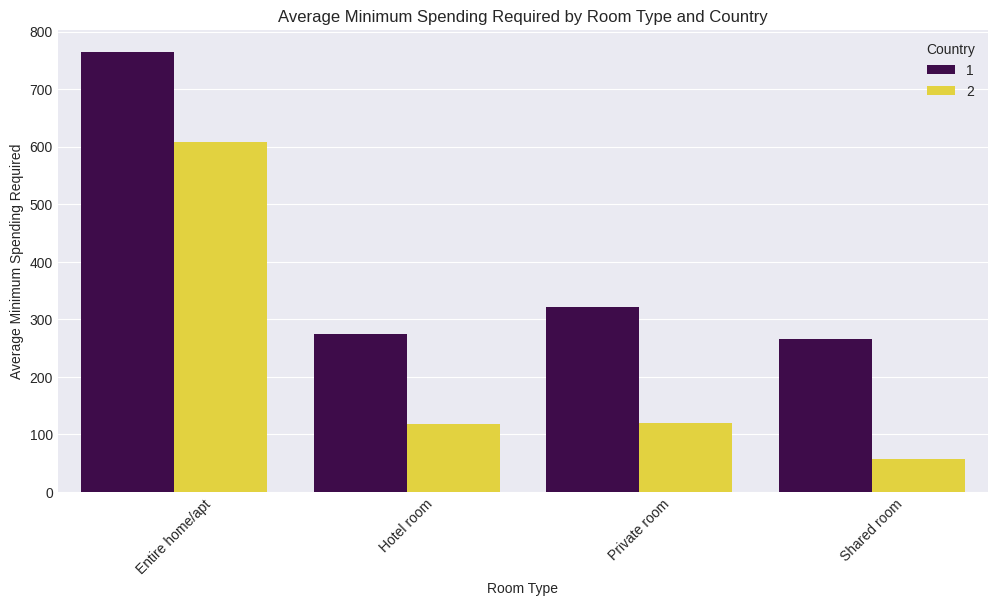

In [ ]:
# Calculate average price, minimum nights, and minimum spending by country and room type
avg_stats_by_country_room = df_new.groupby(['country', 'room_type']).agg(
    avg_price=('price', 'mean'),
    avg_min_nights=('minimum_nights', 'mean'),
    avg_min_spending=('minimum_spending_required', 'mean')
).reset_index()

# Create a bar plot for Average Price by Country and Room Type
plt.figure(figsize=(12, 6))
sns.barplot(x='room_type', y='avg_price', hue='country', data=avg_stats_by_country_room, palette='viridis')
plt.title('Average Price by Room Type and Country')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.show()

# Create a bar plot for Average Minimum Nights by Country and Room Type
plt.figure(figsize=(12, 6))
sns.barplot(x='room_type', y='avg_min_nights', hue='country', data=avg_stats_by_country_room, palette='viridis')
plt.title('Average Minimum Nights by Room Type and Country')
plt.xlabel('Room Type')
plt.ylabel('Average Minimum Nights')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.show()

# Create a bar plot for Average Minimum Spending Required by Country and Room Type
plt.figure(figsize=(12, 6))
sns.barplot(x='room_type', y='avg_min_spending', hue='country', data=avg_stats_by_country_room, palette='viridis')
plt.title('Average Minimum Spending Required by Room Type and Country')
plt.xlabel('Room Type')
plt.ylabel('Average Minimum Spending Required')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import statsmodels.api as sm

# Step 1: Calculate average price by room type
avg_price_by_room = df_new.groupby('room_type').agg(avg_price=('price', 'mean')).reset_index()

# Step 2: Create dummy variables for room types
avg_price_by_room = pd.get_dummies(avg_price_by_room, columns=['room_type'], drop_first=True)

# Step 3: Define the independent (X) and dependent (Y) variables
X = avg_price_by_room.drop('avg_price', axis=1)  # Features (dummy variables)
Y = avg_price_by_room['avg_price']  # Target variable (average price)

# Step 4: Fit the regression model
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(Y, X).fit()

# Step 5: Display the model summary
print(model.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).